In [1]:
import sqlite3

In [39]:
conn=sqlite3.connect("fin.db")

In [40]:
cursor=conn.cursor()

In [41]:
cursor.execute('''CREATE TABLE sales_data (
    segment TEXT,
    country TEXT,
    product TEXT,
    discount_band TEXT,
    units_sold INTEGER,
    manufacturing_price REAL,
    sale_price REAL,
    gross_sales REAL,
    discounts TEXT, -- You can store "$-" or nulls as TEXT
    sales REAL,
    cogs TEXT,      -- You may need to clean "$" and "," in Python
    profit REAL,
    date TEXT,
    month_number INTEGER,
    month_name TEXT,
    year INTEGER)
''')

In [43]:
import pandas as pd
df=pd.read_csv("Fin.csv")

In [44]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [45]:
df.to_sql("sales", conn, if_exists="replace", index=False)

700

In [46]:
conn.commit()

In [47]:
cursor.execute("SELECT * FROM sales")

In [48]:
data=cursor.fetchall()

In [49]:
query = '''
SELECT
    Product,
    SUM(units_sold) AS total_qty,
    SUM(units_sold * sale_price) AS revenue
FROM sales
GROUP BY Product
'''

new = pd.read_sql_query(query, conn)

In [51]:
print(new)

       product  total_qty   revenue
0    Amarilla      155316  19037402
1   Carretera      146847  14937593
2     Montana      154198  16549582
3       Paseo      338238  35611192
4         VTT      168782  21968689
5        Velo      162425  19826916


<Axes: xlabel='product'>

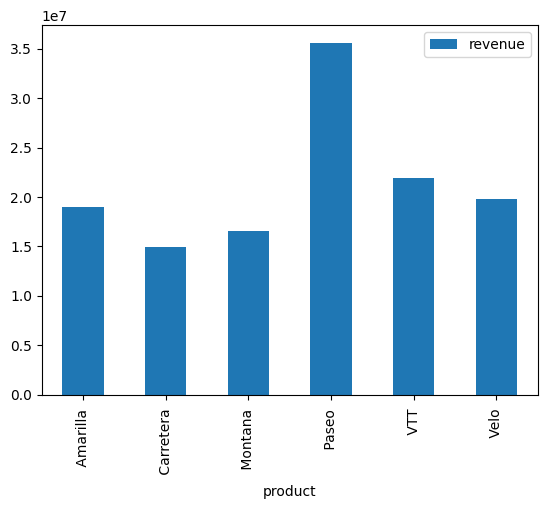

In [52]:
new.plot(kind='bar', x='product', y='revenue')

In [53]:
import matplotlib.pyplot as plt

In [54]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>